In [1]:
import os
os.chdir("..")

In [2]:
from SSTImportanceSampling  import Preprocessor, ImportanceSampler, StormDepthProcessor

Trinity

In [3]:
trinity = Preprocessor(config_path = "/workspaces/Importance-Sampling-for-SST/data/0_source/Trinity/config.json", 
                       output_folder = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Trinity")
trinity.run()

Processing DSS files: 100%|██████████| 440/440 [12:52<00:00,  1.76s/it]


In [ ]:
trinity = Preprocessor.load(config_path = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Trinity/config.json")

In [ ]:
sampler = ImportanceSampler(
    distribution="uniform",
    params = {},
    num_simulations=1_000_000,
    num_rep=1,
)

trinity_fullmonte_samples = sampler.sample(trinity.domain_gdf, trinity.watershed_gdf)

In [ ]:
processor = StormDepthProcessor(
    precip_cube=trinity.cumulative_precip,
    storm_centers=trinity.storm_centers,
    watershed_gdf=trinity.watershed_gdf,
    arrival_rate=10  # average storms per year
)

trinity_fullmonte_depths = processor.shift_and_extract_precip(
    df_storms=trinity_fullmonte_samples,
    n_jobs=-1,    
    seed=42   
)

In [15]:
trinity_fullmonte_depths.to_parquet("trinity_fullmonte_depths.pq")

Duwamish

In [ ]:
duwamish = Preprocessor(config_path = "/workspaces/Importance-Sampling-for-SST/data/0_source/Duwamish/config.json", 
                        output_folder = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Duwamish")
duwamish.run()

Processing DSS files: 100%|██████████| 440/440 [05:29<00:00,  1.34it/s]


In [ ]:
duwamish = Preprocessor.load(config_path = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Duwamish")

In [17]:
sampler = ImportanceSampler(
    distribution="uniform",
    params = {},
    num_simulations=1_000_000,
    num_rep=1,
)

duwamish_fullmonte_samples = sampler.sample(duwamish.domain_gdf, duwamish.watershed_gdf)

In [18]:
processor = StormDepthProcessor(
    precip_cube=duwamish.cumulative_precip,
    storm_centers=duwamish.storm_centers,
    watershed_gdf=duwamish.watershed_gdf,
    arrival_rate=10  # average storms per year
)

duwamish_fullmonte_depths = processor.shift_and_extract_precip(
    df_storms=duwamish_fullmonte_samples,
    n_jobs=-1,    
    seed=42   
)

In [19]:
duwamish_fullmonte_depths.to_parquet("duwamish_fullmonte_depths.pq")

Kanawha

In [ ]:
kanawha = Preprocessor(config_path = "/workspaces/Importance-Sampling-for-SST/data/0_source/Kanawha/config.json", 
                       output_folder = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Kanawha")
kanawha.run()

Processing DSS files: 100%|██████████| 440/440 [12:53<00:00,  1.76s/it]


In [ ]:
kanawha = Preprocessor.load(config_path = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Kanawha")

In [20]:
sampler = ImportanceSampler(
    distribution="uniform",
    params = {},
    num_simulations=1_000_000,
    num_rep=1,
)

kanawha_fullmonte_samples = sampler.sample(kanawha.domain_gdf, kanawha.watershed_gdf)

In [21]:
processor = StormDepthProcessor(
    precip_cube=kanawha.cumulative_precip,
    storm_centers=kanawha.storm_centers,
    watershed_gdf=kanawha.watershed_gdf,
    arrival_rate=10  # average storms per year
)

kanawha_fullmonte_depths = processor.shift_and_extract_precip(
    df_storms=kanawha_fullmonte_samples,
    n_jobs=-1,    
    seed=42   
)

In [22]:
kanawha_fullmonte_depths.to_parquet("kanawha_fullmonte_depths.pq")

Denton

In [4]:
denton = Preprocessor(config_path = "/workspaces/Importance-Sampling-for-SST/data/0_source/Denton/config.json", 
                      output_folder = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Denton")
denton.run()

Processing DSS files: 100%|██████████| 440/440 [12:45<00:00,  1.74s/it]


In [3]:
denton = Preprocessor.load(config_path = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Denton/config.json")

In [18]:
sampler = ImportanceSampler(
    distribution="uniform",
    params = {},
    num_simulations=20_000,
    num_rep=50,
)

denton_fullmonte_samples = sampler.sample(denton.domain_gdf, denton.watershed_gdf)

In [19]:
processor = StormDepthProcessor(
    precip_cube=denton.cumulative_precip,
    storm_centers=denton.storm_centers,
    watershed_gdf=denton.watershed_gdf,
    arrival_rate=10  # average storms per year
)

denton_fullmonte_depths = processor.shift_and_extract_precip(
    df_storms=denton_fullmonte_samples,
    n_jobs=-1,    
    seed=42   
)

In [21]:
denton_fullmonte_depths.to_parquet("/workspaces/Importance-Sampling-for-SST/data/1_interim/Denton/denton_fullmonte_depths.pq")

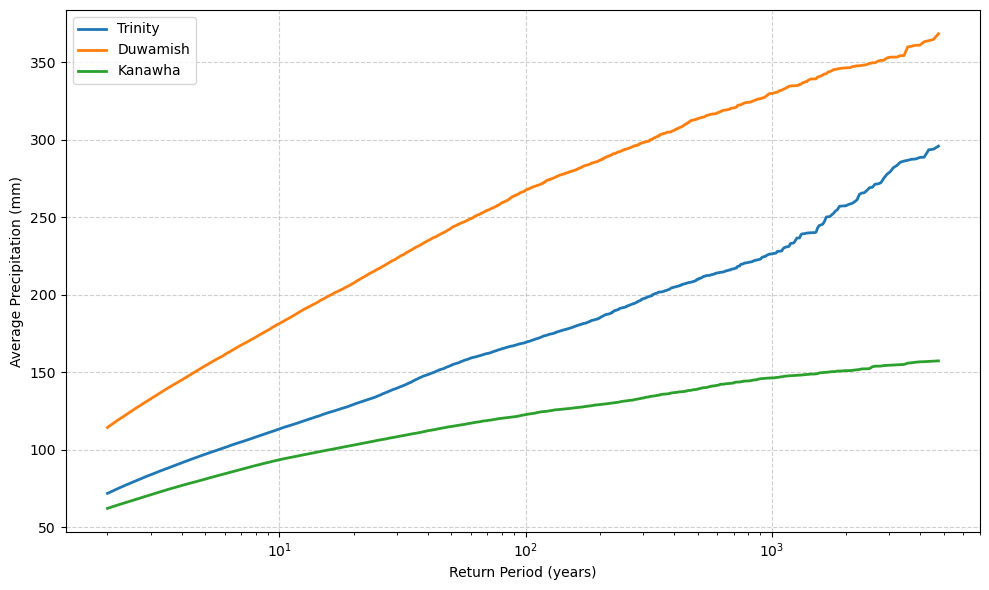

In [29]:
import matplotlib.pyplot as plt

# Filter each DataFrame for return periods between 1 and 5000 years
trinity_filtered = trinity_fullmonte_depths[(trinity_fullmonte_depths["return_period"] >= 2) & (trinity_fullmonte_depths["return_period"] <= 5000)]
duwamish_filtered = duwamish_fullmonte_depths[(duwamish_fullmonte_depths["return_period"] >= 2) & (duwamish_fullmonte_depths["return_period"] <= 5000)]
kanawha_filtered = kanawha_fullmonte_depths[(kanawha_fullmonte_depths["return_period"] >= 2) & (kanawha_fullmonte_depths["return_period"] <= 5000)]

# Sort by return period for proper line plotting
trinity_filtered = trinity_filtered.sort_values("return_period")
duwamish_filtered = duwamish_filtered.sort_values("return_period")
kanawha_filtered = kanawha_filtered.sort_values("return_period")

# Plot
plt.figure(figsize=(10, 6))

plt.plot(trinity_filtered["return_period"], trinity_filtered["precip_avg_mm"], label="Trinity", linewidth=2)
plt.plot(duwamish_filtered["return_period"], duwamish_filtered["precip_avg_mm"], label="Duwamish", linewidth=2)
plt.plot(kanawha_filtered["return_period"], kanawha_filtered["precip_avg_mm"], label="Kanawha", linewidth=2)

# Log x-axis for clarity in extreme return periods
plt.xscale("log")

plt.xlabel("Return Period (years)")
plt.ylabel("Average Precipitation (mm)")
plt.title("")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
